In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data=pd.read_csv("/kaggle/input/dataset1/mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
data['name'].value_counts()

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [6]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
data['name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [9]:
data['name']=data['name'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
data['name']=data['name'].replace(['volkswagen','vw','vokswagen'],'volkswagen')
data['name']=data['name'].replace('maxda','mazda')
data['name']=data['name'].replace('toyouta','toyota')
data['name']=data['name'].replace('mercedes','mercedes-benz')
data['name']=data['name'].replace('nissan','datsun')
data['name']=data['name'].replace('capri','ford')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

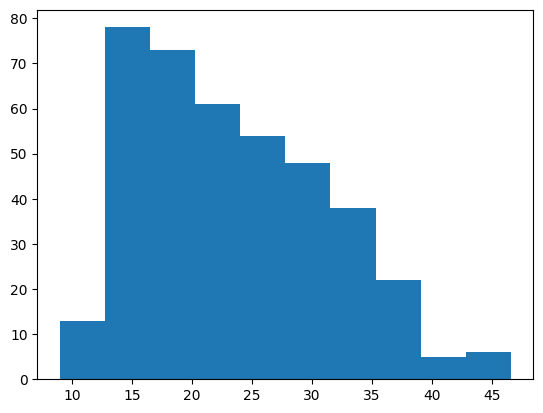

In [11]:
plt.hist(data.mpg)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

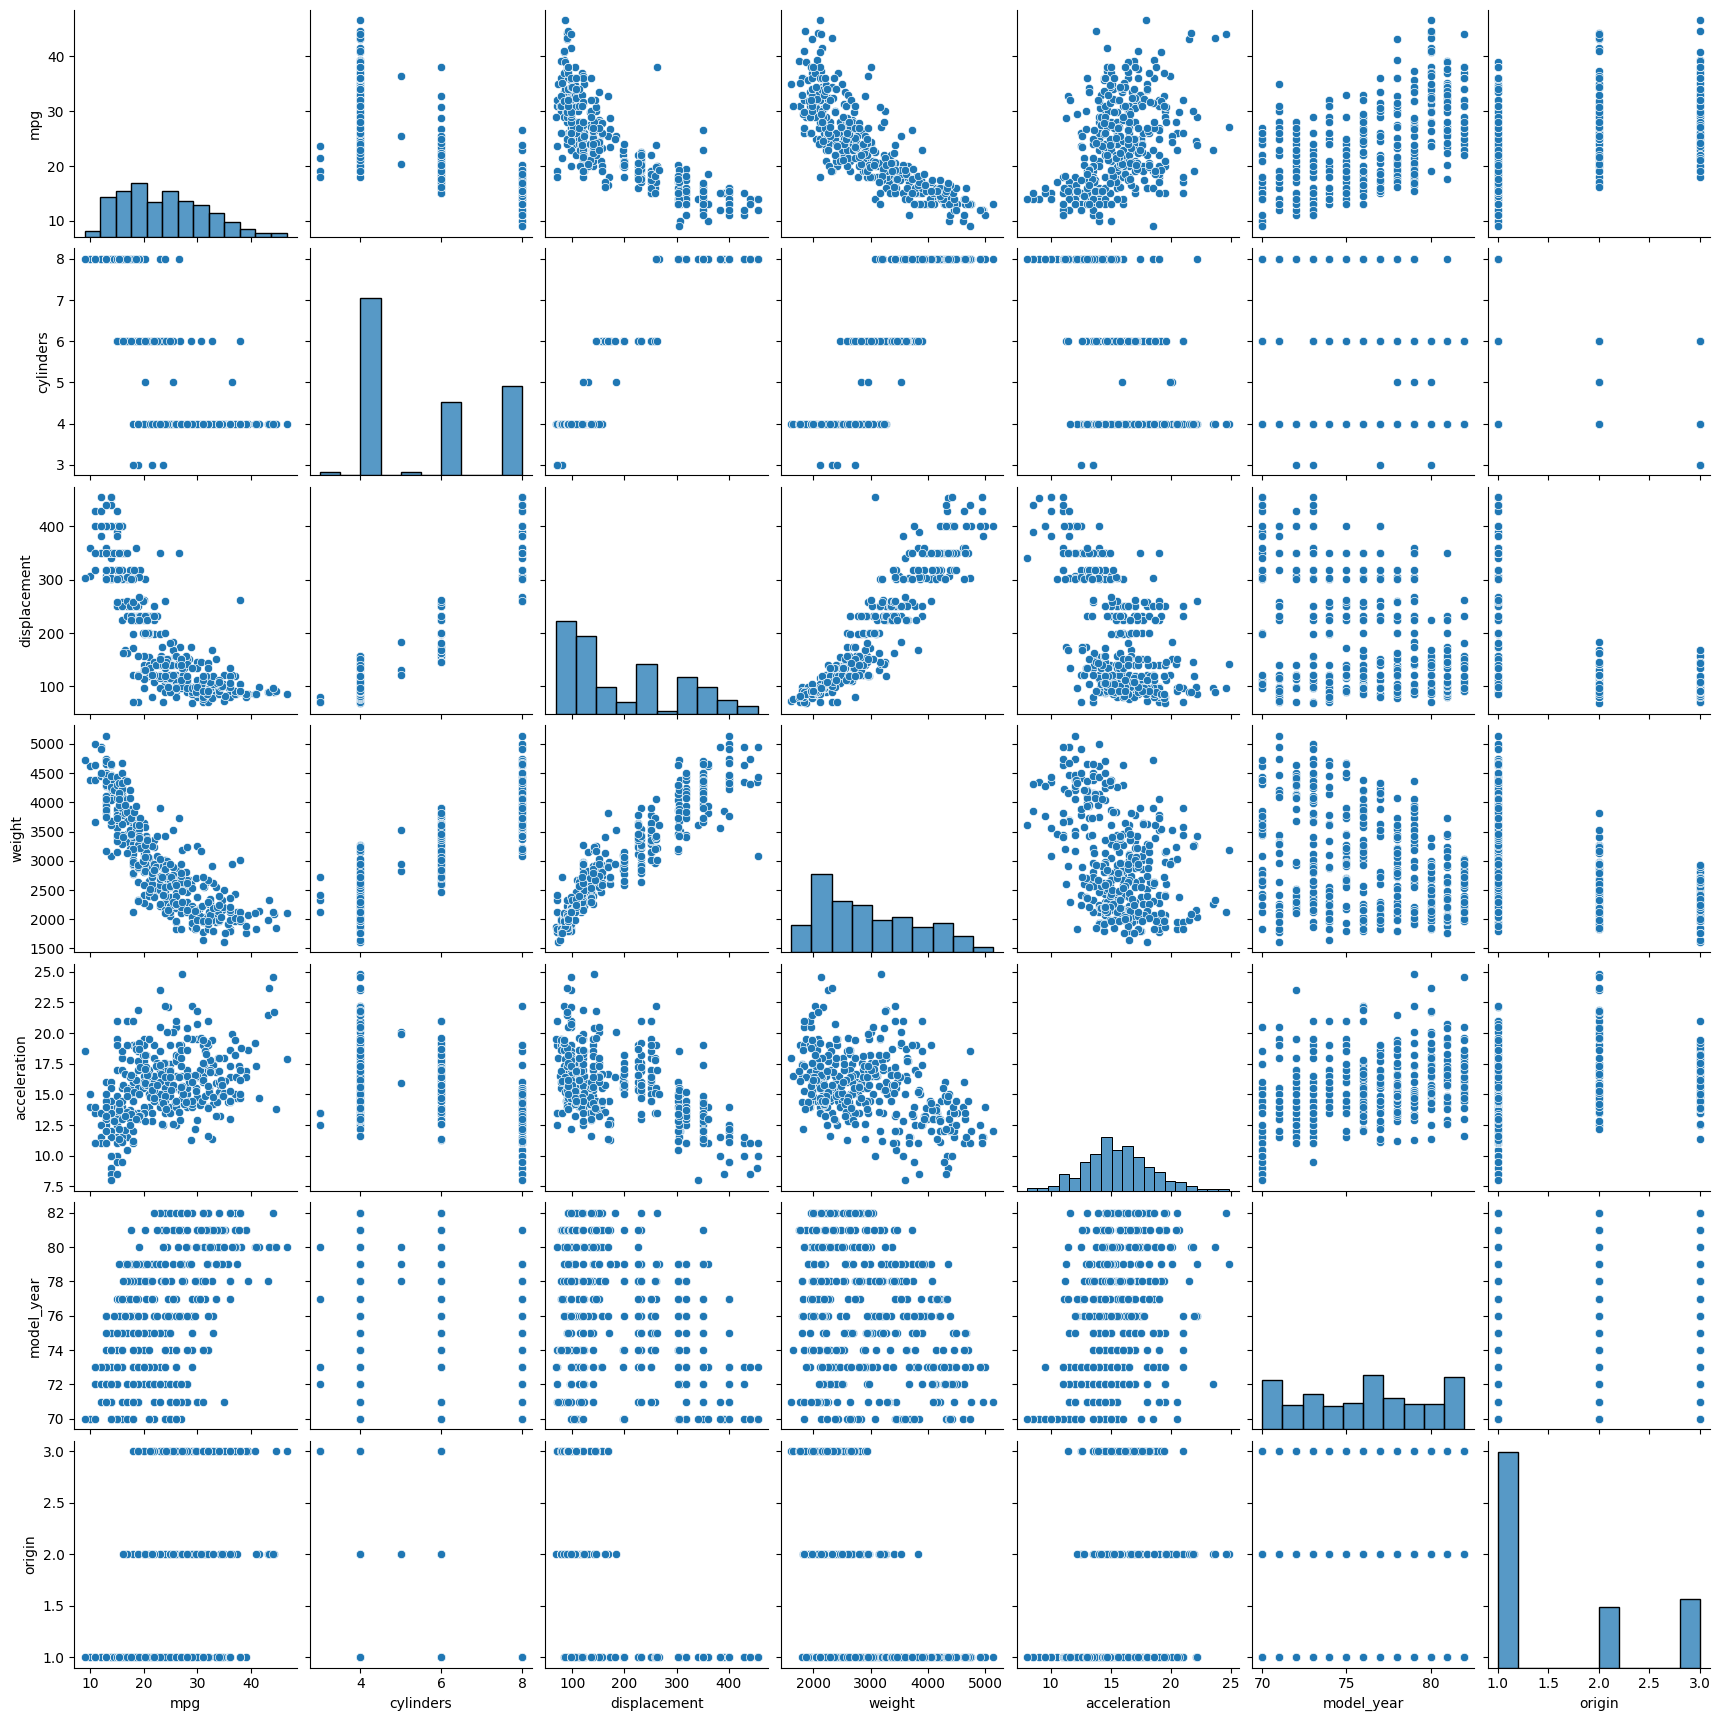

In [13]:
sns.pairplot(data)

In [14]:
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['horsepower', 'name'], dtype='object')
Numerical Columns: Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')


In [15]:
print(data.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


In [16]:
print(data.head()) 

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [19]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


data['car_name_encoded'] = label_encoder.fit_transform(data['name'])
data['horsepower_encoded'] = label_encoder.fit_transform(data['horsepower'])


print(data[['name', 'horsepower', 'car_name_encoded', 'horsepower_encoded']])

                          name horsepower  car_name_encoded  \
0    chevrolet chevelle malibu        130                49   
1            buick skylark 320        165                36   
2           plymouth satellite        150               231   
3                amc rebel sst        150                14   
4                  ford torino        140               161   
..                         ...        ...               ...   
393            ford mustang gl         86               153   
394                  vw pickup         52               301   
395              dodge rampage         84               119   
396                ford ranger         79               159   
397                 chevy s-10         82                69   

     horsepower_encoded  
0                    15  
1                    33  
2                    27  
3                    27  
4                    22  
..                  ...  
393                  80  
394                  51  
395      

In [20]:
data_one_hot = pd.get_dummies(data, columns=['name', 'horsepower'])

print(data_one_hot)

      mpg  cylinders  displacement  weight  acceleration  model_year  origin  \
0    18.0          8         307.0    3504          12.0          70       1   
1    15.0          8         350.0    3693          11.5          70       1   
2    18.0          8         318.0    3436          11.0          70       1   
3    16.0          8         304.0    3433          12.0          70       1   
4    17.0          8         302.0    3449          10.5          70       1   
..    ...        ...           ...     ...           ...         ...     ...   
393  27.0          4         140.0    2790          15.6          82       1   
394  44.0          4          97.0    2130          24.6          82       2   
395  32.0          4         135.0    2295          11.6          82       1   
396  28.0          4         120.0    2625          18.6          82       1   
397  31.0          4         119.0    2720          19.4          82       1   

     car_name_encoded  horsepower_encod

In [22]:
data = data.loc[:, (data != 0).any(axis=0)]


print(data[['name', 'horsepower', 'car_name_encoded', 'horsepower_encoded']])

                          name horsepower  car_name_encoded  \
0    chevrolet chevelle malibu        130                49   
1            buick skylark 320        165                36   
2           plymouth satellite        150               231   
3                amc rebel sst        150                14   
4                  ford torino        140               161   
..                         ...        ...               ...   
393            ford mustang gl         86               153   
394                  vw pickup         52               301   
395              dodge rampage         84               119   
396                ford ranger         79               159   
397                 chevy s-10         82                69   

     horsepower_encoded  
0                    15  
1                    33  
2                    27  
3                    27  
4                    22  
..                  ...  
393                  80  
394                  51  
395      

In [24]:
import numpy as np


data.replace('?', np.nan, inplace=True)


data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')


data['horsepower'].fillna(data['horsepower'].median(), inplace=True)


data = data.loc[:, (data != 0).any(axis=0)]


print(data[['name', 'horsepower', 'car_name_encoded', 'horsepower_encoded']])

                          name  horsepower  car_name_encoded  \
0    chevrolet chevelle malibu       130.0                49   
1            buick skylark 320       165.0                36   
2           plymouth satellite       150.0               231   
3                amc rebel sst       150.0                14   
4                  ford torino       140.0               161   
..                         ...         ...               ...   
393            ford mustang gl        86.0               153   
394                  vw pickup        52.0               301   
395              dodge rampage        84.0               119   
396                ford ranger        79.0               159   
397                 chevy s-10        82.0                69   

     horsepower_encoded  
0                    15  
1                    33  
2                    27  
3                    27  
4                    22  
..                  ...  
393                  80  
394                  51

<ipython-input-24-3c921930d344>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].median(), inplace=True)


In [25]:
data[['displacement','horsepower','weight','acceleration']]=StandardScaler().fit_transform(data[['displacement','horsepower','weight','acceleration']])

In [26]:
data.shape

(398, 11)

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


data.replace('?', np.nan, inplace=True)
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)


label_encoder = LabelEncoder()
data['car_name_encoded'] = label_encoder.fit_transform(data['name'])


X = data[['car_name_encoded', 'horsepower']]  
y = data['mpg']  

<ipython-input-27-5b54843dcae7>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].median(), inplace=True)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)


y_pred = lr.predict(X_test)
print("Predictions:", y_pred)

Coefficients: [ 0.00918163 -6.05072453]
Intercept: 22.085118388682623
Predictions: [31.75021106 27.55572109 22.83158311 17.03665093 16.88056318 27.13000628
 25.30238835  5.21908928 23.0369873  25.17481582  8.51136557 29.53119118
 29.5239502  14.94323868 27.30829003 11.15226753 27.40351462 21.54090275
 12.33669815 29.47368773 29.16974781 25.57977798 22.21499466 26.44427051
 18.46216911 33.13905126 25.46330344 26.97391853 19.63400983 13.32296557
 26.39112136 29.55102207 19.15367824 26.05722288 29.06775524  4.40244555
 23.3839487  16.16728251 16.89892644 25.6546501  22.2720251  31.73331541
 23.5738763   5.76080561 25.80449147 26.48729199 27.85000636 22.7770149
 25.92868002 29.97143653 27.79297592 29.90328382 28.71113919  9.1908064
 21.65974239 13.10166035 15.5124999  26.85891161 24.949132   25.7266841
 11.96025121 31.78693759 26.89417052 26.77433627 25.57977798 26.04804125
 27.03624931 29.51765525 29.71335622 18.45298747 30.70691319 14.94323868
  8.5287828  21.26493218 21.42101994 23.0278

In [29]:
y_pred=lr.predict(X_test)
mean_squared_error(y_pred,y_test)

19.011673262076354

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6464026270646485